# 21DS603 Term Project 
## Question: Implement Clustering Concept using Kruskal's algorithm

## TEAM 6
### ANSHUMAN PILLAI : CB.EN.P2DSC21003
### PARVATHI PRADEEP :CB.EN.P2DSC21019

In [1]:
import numpy as np
from scipy.spatial import KDTree
from collections import defaultdict
from networkx.algorithms import tree
import matplotlib.pyplot as plt
import networkx as nx

### We generate 5 points with random distances using KD Tree. The result is a sparse matrix containing all the connected points and their distances.

In [2]:
N   = 5
pts = np.random.random((N,2))

tree = KDTree(pts)
g2=tree.sparse_distance_matrix(tree,1.0)
print(g2)

  (0, 1)	0.527955845381816
  (0, 2)	0.3115987961578865
  (0, 3)	0.4578589206898065
  (0, 4)	0.4677405543306638
  (1, 0)	0.527955845381816
  (1, 2)	0.23449683240712002
  (1, 3)	0.07115158281784927
  (1, 4)	0.6163659324871216
  (2, 0)	0.3115987961578865
  (2, 1)	0.23449683240712002
  (2, 3)	0.17360784837029442
  (2, 4)	0.43064621831932515
  (3, 0)	0.4578589206898065
  (3, 1)	0.07115158281784927
  (3, 2)	0.17360784837029442
  (3, 4)	0.5803251988276575
  (4, 0)	0.4677405543306638
  (4, 1)	0.6163659324871216
  (4, 2)	0.43064621831932515
  (4, 3)	0.5803251988276575


### Here the list l2 contains the start node,end node and the weight as the distance between them. This given as an input to create the graph

In [3]:
l2=[]
a=[]
keys=list(g2.keys())
values=list(g2.values())
for i in range(len(keys)):
    a=list([keys[i][0],keys[i][1],values[i]])
    l2.append(a)
print(l2)

[[0, 1, 0.527955845381816], [0, 2, 0.3115987961578865], [0, 3, 0.4578589206898065], [0, 4, 0.4677405543306638], [1, 0, 0.527955845381816], [1, 2, 0.23449683240712002], [1, 3, 0.07115158281784927], [1, 4, 0.6163659324871216], [2, 0, 0.3115987961578865], [2, 1, 0.23449683240712002], [2, 3, 0.17360784837029442], [2, 4, 0.43064621831932515], [3, 0, 0.4578589206898065], [3, 1, 0.07115158281784927], [3, 2, 0.17360784837029442], [3, 4, 0.5803251988276575], [4, 0, 0.4677405543306638], [4, 1, 0.6163659324871216], [4, 2, 0.43064621831932515], [4, 3, 0.5803251988276575]]


### To represent the graph structure, we use a class Graph that initializes the vertices and a dictionary to store the graph. The find function is used to find the parent node for the respective vertice . The union function will combine the minimum edge weight nodes based on the current parent node and the rank. 
### The graph made is sorted and then the Kruskal algorithm is used for clustering. Finally the (k-1) expensive edges are removed to obtain the k clusters. 
### To get the unconnected nodes, the difference between the set of vertices and the set of mst vertices is taken.

In [4]:
# Class to represent a graph

class Graph:

    def __init__(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = [] # default dictionary to store graph

    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    # A utility function to find set of an element i (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    # A function that does union of two sets of x and y (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)

        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot

        # If ranks are same, then make one as root and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1


    def KruskalMST(self,k):

        result = [] # This will store the resultant MST
        
        # An index variable, used for sorted edges
        i = 0

        # An index variable, used for result[]
        e = 0
       
        # sort edges according to their weights

        self.graph = sorted(self.graph,key=lambda item: item[2])

        parent = [] # to store the current list of parent nodes
        rank = [] # to store the rank of the nodes

        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        # Number of edges less than k for the k clusters and the target class has k classes in it.
        while e<self.V-1 :

            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            # If including this edge does't
            # cause cycle, include it in result
            # and increment the indexof result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            
            # Else discard the edge
        
        if k==1:
             return result,[] # k=1 implies full MST. So return the whole set of nodes and empty list for unconnected nodes.
        else:
            result=result[:-(k-1)] # this gives the required k clusters
            print("res",result)
            
            A=set(i for i in range(0,self.V))  # All the vertices as a set
            # B=set of all connected nodes
            B=set.union(set(result[i][0] for i in range(len(result))),set(result[i][1] for i in range(len(result)))) 
        
            minimumCost = 0
            print ("Edges in the constructed MST")
            for u, v, weight in result:
                minimumCost += weight
                print("%d -- %d == %d" % (u, v, weight))
            #print("Minimum Spanning Tree" , minimumCost)

        # returns the connected vertices as found by kruskal and the left out vertices as difference of sets A and B
            return result,A.difference(B)  

# Driver code
g3=Graph(5)
for i in range(len(l2)):
    g3.addEdge(l2[i][0],l2[i][1],l2[i][2])

# Function call
r,sep=g3.KruskalMST(3)  # k given as parameter for function

# Stores the result and unconnected nodes separately for plotting


res [[1, 3, 0.07115158281784927], [2, 3, 0.17360784837029442]]
Edges in the constructed MST
1 -- 3 == 0
2 -- 3 == 0


### Printing the connected and unconnected nodes

In [5]:
print(r)

[[1, 3, 0.07115158281784927], [2, 3, 0.17360784837029442]]


In [6]:
unconnected_pts=list(sep)
print(unconnected_pts)

[0, 4]


### Plotting the vertices as clusters

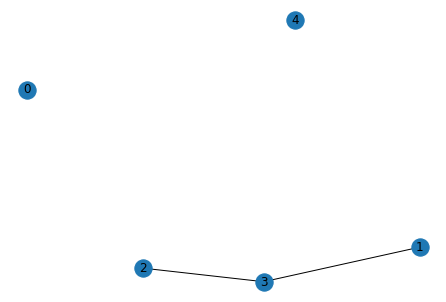

In [7]:
g = nx.Graph()
for i in range(len(r)):
    g.add_edge(r[i][0],r[i][1],weight=r[i][2]) # plotting connected nodes
for i in range(len(unconnected_pts)):
    g.add_node(unconnected_pts[i])             # plotting unconnected nodes
    
nx.draw(g,with_labels=True)

### Example Set of Points for graph

In [ ]:
# g = Graph(7)
# g.addEdge(0,1,28)
# g.addEdge(0,5,10)
# g.addEdge(1,2,16)
# g.addEdge(1,6,14)
# g.addEdge(2,3,12)
# g.addEdge(3,6,18)
# g.addEdge(3,4,22)
# g.addEdge(4,6,24)
# g.addEdge(4,5,25)
